In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('zomato.csv')

In [2]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari


In [42]:
df['cuisines'].fillna('-',inplace=True)
df.isnull().sum()
df['Number_of_cuisines_offered'] = df['cuisines'].apply(lambda x : len(x.split(',')))

In [3]:
#dropping unnecessary columns
col = ['url', 'address', 'phone']
df.drop(col, inplace=True, axis=1)
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [4]:
#renaming columns
df = df.rename(columns={'approx_cost(for two people)':'approx_cost', 'listed_in(type)':'type', 'listed_in(city)':'neighbourhood'})
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost', 'reviews_list',
       'menu_item', 'type', 'neighbourhood'],
      dtype='object')

In [5]:
#dropping duplicate records
duplicate_records = df[df.duplicated()]
len(duplicate_records)
df.drop_duplicates(inplace=True)

In [6]:
#cleaning rates by removing '/5'
def clean_rate(rate):
    if rate == '-' or rate == 'NEW':
        return np.nan
    l = str(rate).split('/')
    return float(l[0])
df['rate'] = df['rate'].apply(clean_rate)
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51654, dtype: float64

In [7]:
#cleaning approx costs
df['approx_cost'] = df['approx_cost'].str.replace(',', '').astype(float)
df['approx_cost']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: approx_cost, Length: 51654, dtype: float64

<AxesSubplot:>

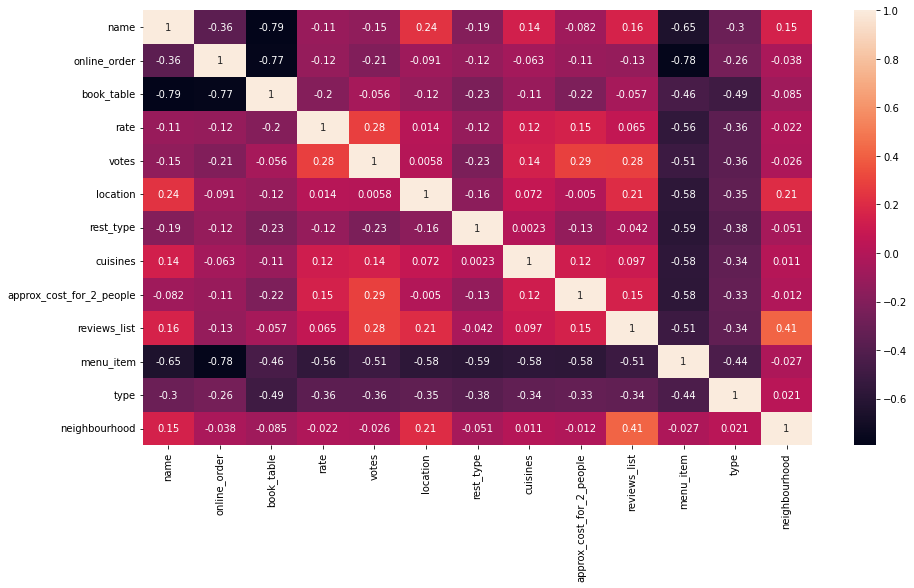

In [14]:
corr_df=df.drop(['dish_liked'],axis=1)
corr_df.rename({'approx_cost': 'approx_cost_for_2_people',
               'listed_in(type)':'listed_in_type',
               'listed_in(city)':'listed_in_city'
              }, axis=1, inplace=True)
remove_comma = lambda x: int(x.replace(',', '')) if type(x) == np.str and x != np.nan else x 
corr_df.votes = corr_df.votes.astype('int')
corr_df['approx_cost_for_2_people'] = corr_df['approx_cost_for_2_people'].apply(remove_comma)
corr_df = corr_df.loc[corr_df.rate !='NEW']
corr_df = corr_df.loc[corr_df.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
# corr_df.rate = corr_df.rate.apply(remove_slash).str.strip().astype('float')
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'approx_cost_for_2_people', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

corr_df = Encode(corr_df.copy())
corr_df['rate'] = corr_df['rate'].fillna(corr_df['rate'].mean())
corr_df['approx_cost_for_2_people'] = corr_df['approx_cost_for_2_people'].fillna(corr_df['approx_cost_for_2_people'].mean())
corr = corr_df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

Text(0, 0.5, 'Name of Restaurants')

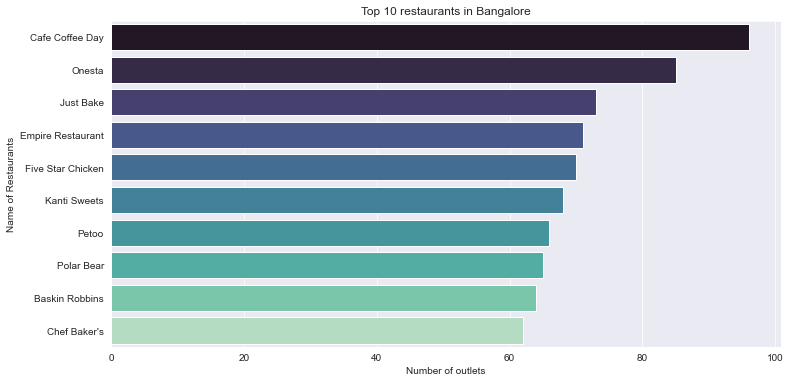

In [15]:
plt.figure(figsize = (12,6))
sns.set_style('darkgrid')
ch = df['name'].value_counts()[:10]

sns.barplot(x= ch,y = ch.index, palette = 'mako')
plt.title('Top 10 restaurants in Bangalore')
plt.xlabel('Number of outlets')
plt.ylabel('Name of Restaurants')

<function matplotlib.pyplot.show(close=None, block=None)>

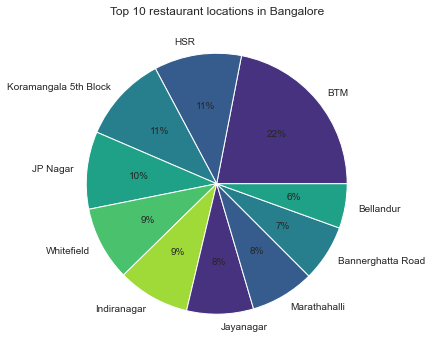

In [59]:
plt.figure(figsize = (12,6))
sns.set_style('darkgrid')
ch = df['location'].value_counts()[:10]

sns.barplot(x= ch,y = ch.index,palette = 'viridis')
plt.title('Top 10 restaurant locations in Bangalore')
plt.xlabel('Number of outlets')
plt.ylabel('Location')
plt.show

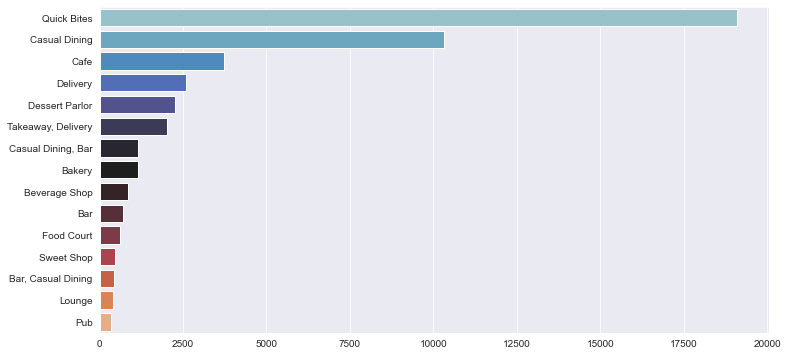

In [17]:
plt.figure(figsize = (12,6))

rt = df['rest_type'].value_counts()[:15]
sns.barplot(x= rt,y = rt.index,palette = 'icefire')
plt.xlabel('')
plt.show()

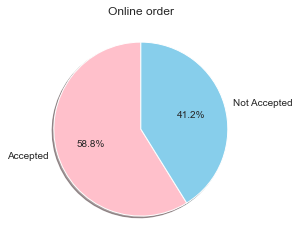

In [18]:
labels = ["Accepted",'Not Accepted']
values = df['online_order'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['pink', 'skyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.title('Online order')
plt.show()

C:\Users\rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

Text(0.5, 1.0, 'Location wise count for restaurants')

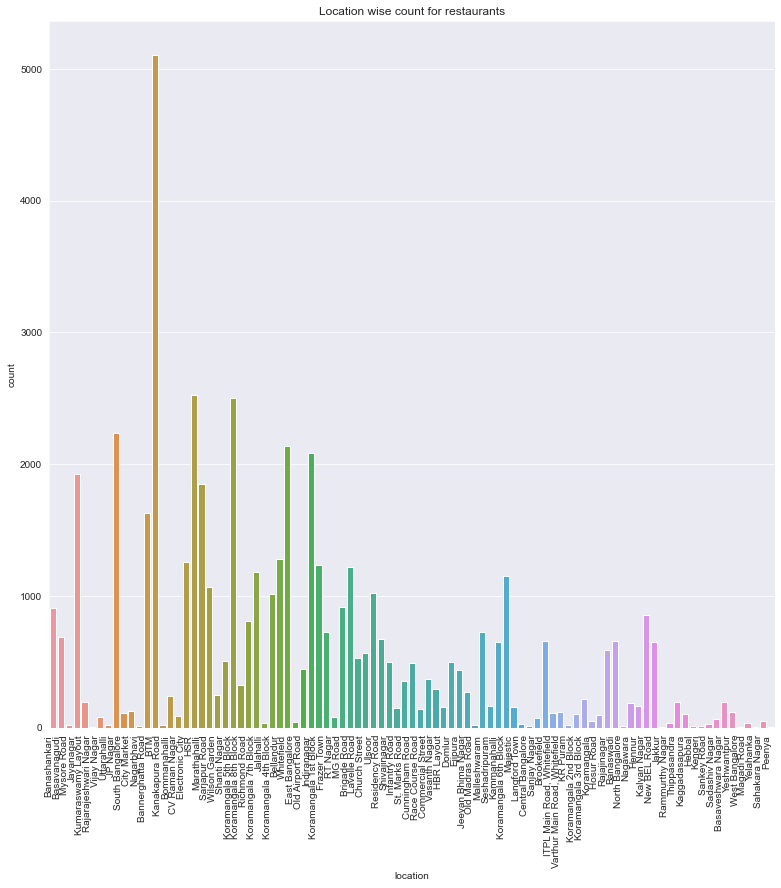

In [19]:
sns.countplot(df['location'])
sns.countplot(df['location']).set_xticklabels(sns.countplot(df['location']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Location wise count for restaurants')

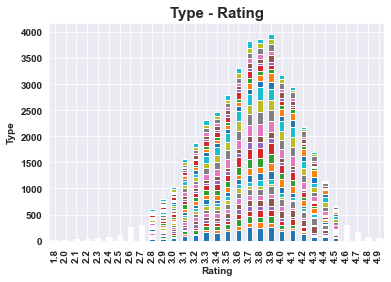

In [29]:
type_plt=pd.crosstab(df['rate'],df['neighbourhood'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

C:\Users\rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'No. of restaurants')

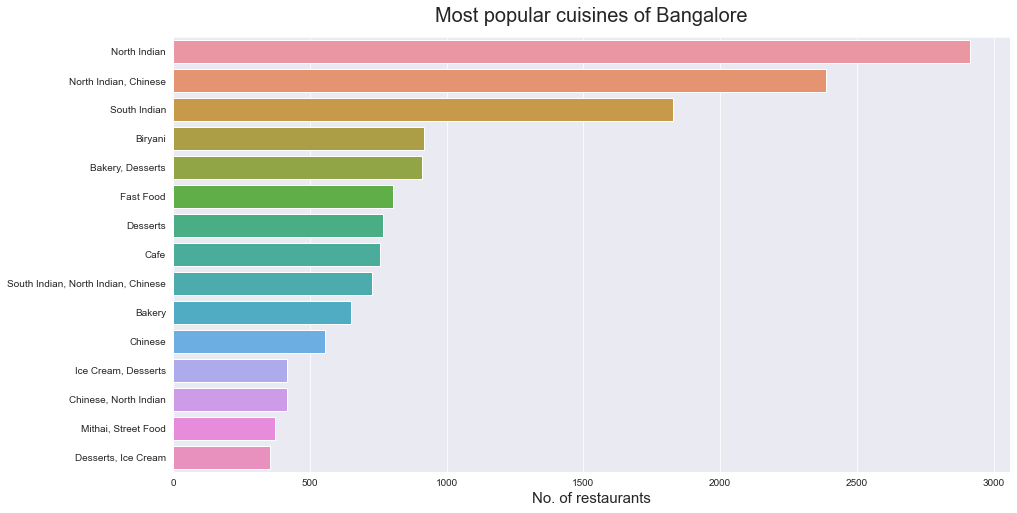

In [ ]:
plt.figure(figsize=(15,8))
cuisines=df['cuisines'].value_counts()[:15]
sns.barplot(cuisines,cuisines.index)
plt.title('Most popular cuisines of Bangalore', size = 20, pad = 15)
plt.xlabel('No. of restaurants',size = 15)

C:\Users\rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Percentage of restaurants')

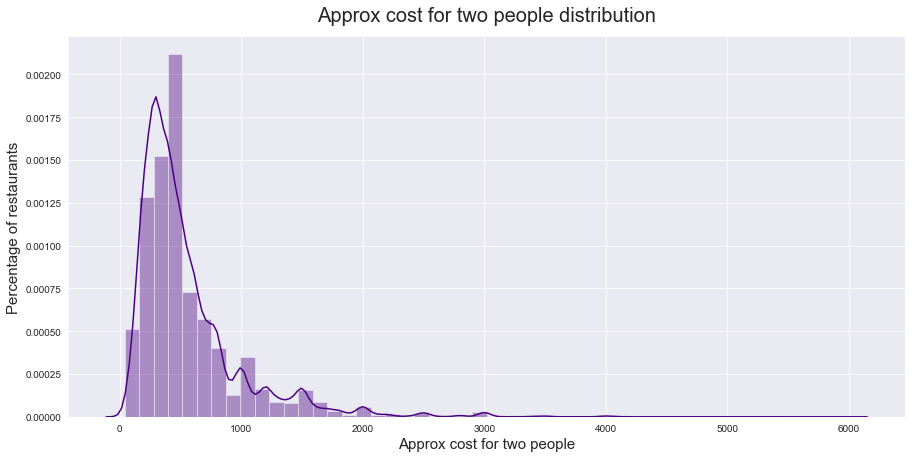

In [64]:
fig, ax = plt.subplots(figsize=[15,7])
colors = sns.color_palette('viridis')
sns.distplot(df['approx_cost'],color="indigo")
ax.set_title('Approx cost for two people distribution',size=20,pad=15)
plt.xlabel('Approx cost for two people',size = 15)
plt.ylabel('Percentage of restaurants',size = 15)

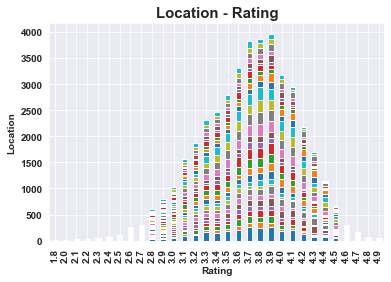

In [33]:
loc_plt=pd.crosstab(df['rate'],df['neighbourhood'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Location - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.legend().remove()

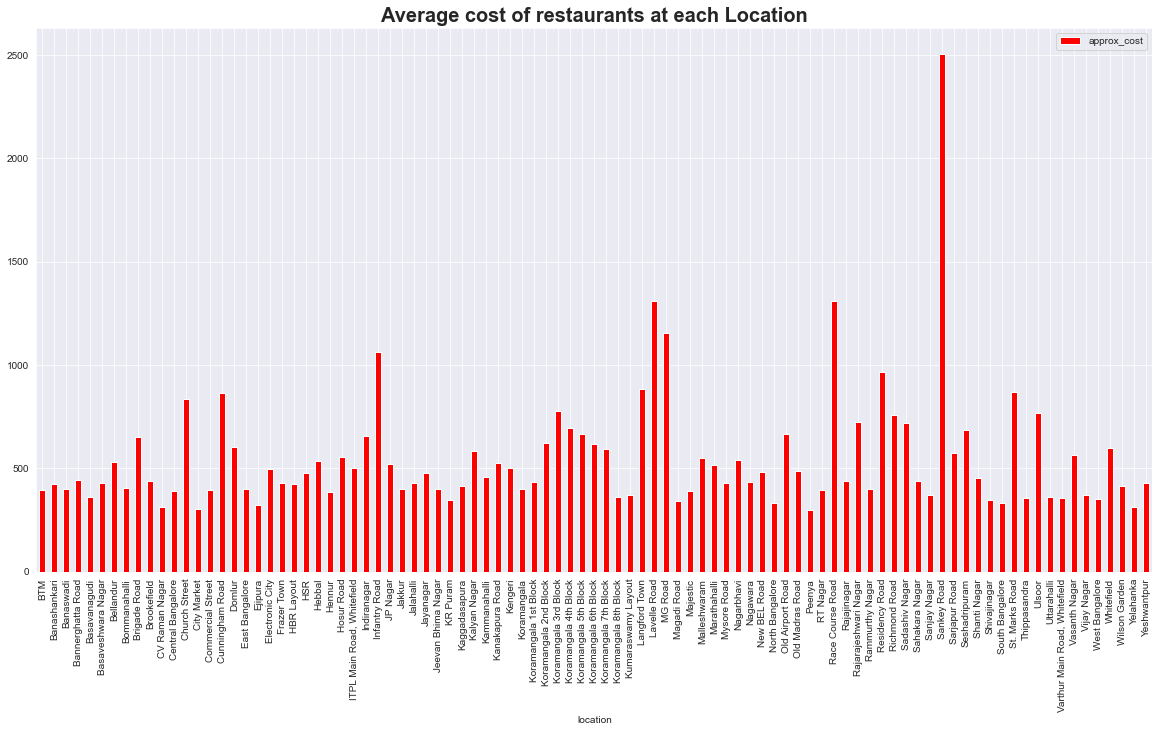

In [35]:
a = df.groupby('location').agg({'approx_cost':'mean'})

plt.rcParams["figure.figsize"] = (20,10)
a.plot(kind='bar', color='red')
plt.title('Average cost of restaurants at each Location', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.show()

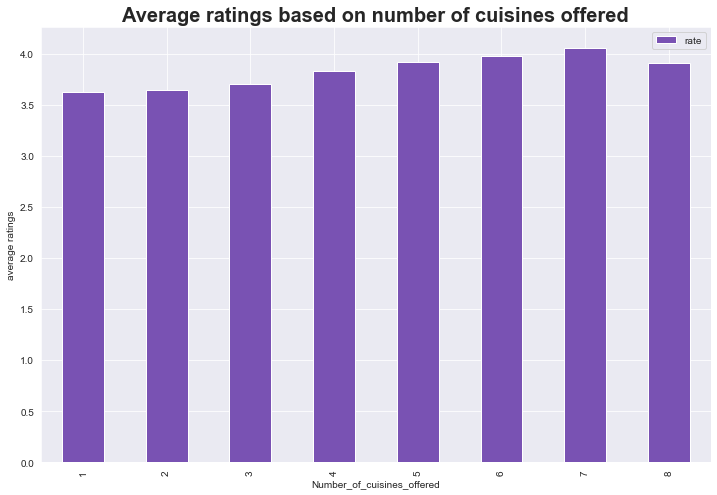

In [43]:
# df['Number_of_cuisines_offered'] = df['cuisines'].apply(lambda x : len(x.split(',')))
a = df.groupby('Number_of_cuisines_offered').agg({'rate':'mean'})
plt.rcParams["figure.figsize"] = (12,8)
a.plot(kind='bar', color='#7952B3')
plt.title('Average ratings based on number of cuisines offered', fontsize=20, fontweight='bold')
plt.ylabel('average ratings')
plt.legend()
plt.show()

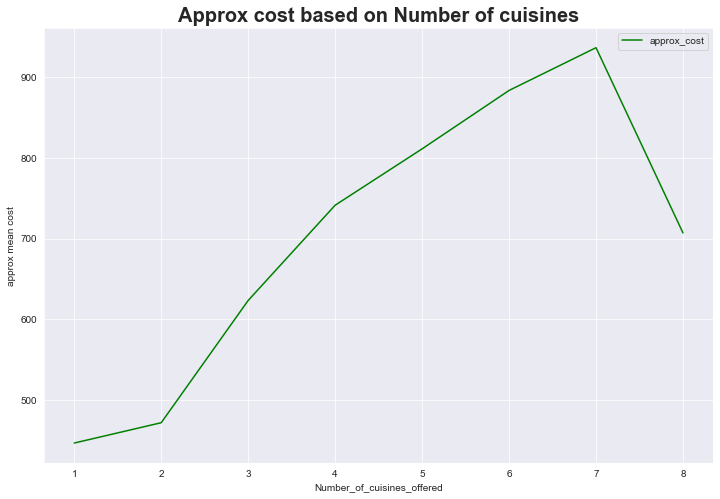

In [58]:
a = df.groupby('Number_of_cuisines_offered').agg({'approx_cost':'mean'})
plt.rcParams["figure.figsize"] = (12,8)
a.plot(kind='line', color='green')
plt.title('Approx cost based on Number of cuisines', fontsize=20, fontweight='bold')
plt.ylabel('approx mean cost')
plt.legend()
plt.show()

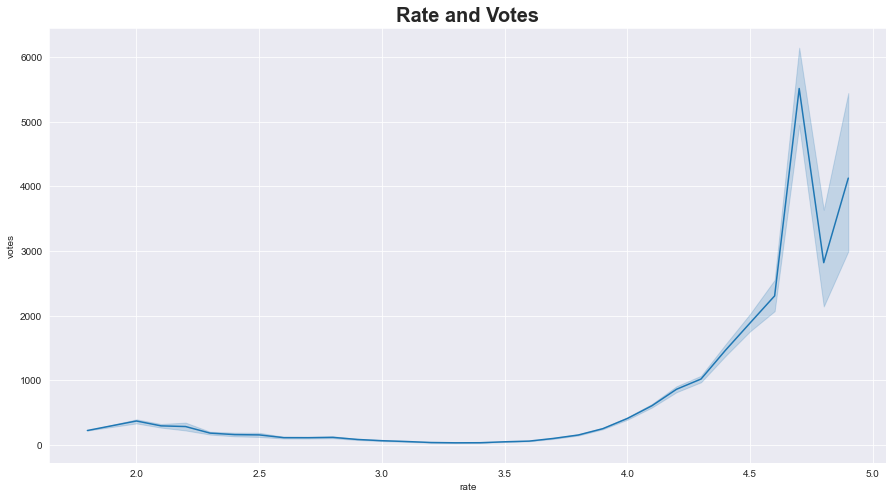

In [45]:
plt.figure(figsize=(15,8))
sns.lineplot(x='rate', y='votes', data=df)
plt.title('Rate and Votes', fontsize=20, fontweight='bold')
plt.show()

In [50]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [52]:
stop = set(stopwords.words('english'))
series_tweets = df['dish_liked']
tweet_str = series_tweets.str.cat(sep = ',')
list_of_words = [i.lower() for i in wordpunct_tokenize(tweet_str) if i.lower() not in stop and i.isalpha()]
wordfreqdist = nltk.FreqDist(list_of_words)
mostcommon = wordfreqdist.most_common(30)
print(mostcommon)

[('chicken', 14765), ('biryani', 7639), ('pizza', 4683), ('pasta', 4137), ('chocolate', 3303), ('burgers', 3022), ('masala', 2985), ('cocktails', 2829), ('coffee', 2782), ('paneer', 2641), ('mutton', 2500), ('butter', 2314), ('fries', 2157), ('peri', 2150), ('fish', 2130), ('paratha', 2099), ('tea', 2000), ('beer', 1952), ('soup', 1936), ('mocktails', 1887), ('curry', 1851), ('noodles', 1790), ('dosa', 1743), ('thali', 1716), ('sandwiches', 1711), ('tikka', 1663), ('sandwich', 1619), ('rice', 1599), ('nachos', 1504), ('veg', 1456)]


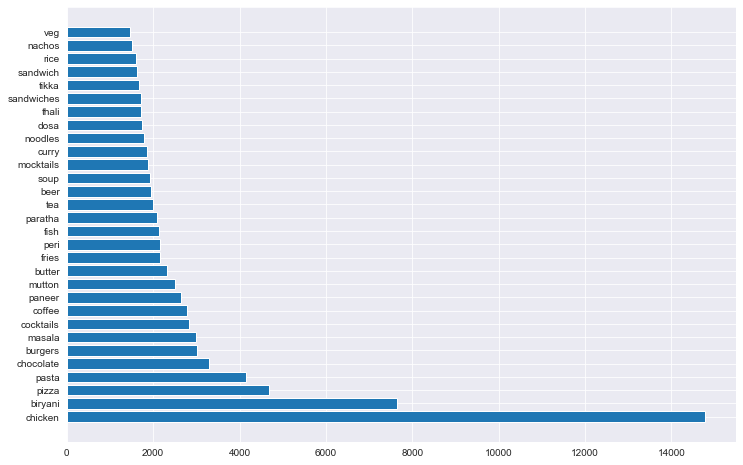

In [53]:
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()